
# Set up the notebook

In [1]:

%run ../../load_magic/storage.py
%run ../../load_magic/dataframes.py
%run ../../load_magic/environment.py
%pprint
pd.options.display.float_format = '{:20,.2f}'.format
notebook_path = get_notebook_path()
print(notebook_path)
s = Storage()
print(['s.{}'.format(fn) for fn in dir(s) if not fn.startswith('_')])
column_description_dict = s.load_object('column_description_dict')
us_stats_df = s.load_object('us_stats_df')
dir()

Pretty printing has been turned OFF
D:\Documents\Repositories\notebooks\StatsByCountry\ipynb\US State Stats.ipynb
['s.attempt_to_pickle', 's.data_csv_folder', 's.data_folder', 's.encoding_type', 's.load_csv', 's.load_dataframes', 's.load_object', 's.save_dataframes', 's.saves_csv_folder', 's.saves_folder', 's.saves_pickle_folder', 's.store_objects']


['Config', 'In', 'Out', 'RandomForestClassifier', 'Storage', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__nonzero__', '__package__', '__spec__', '_dh', '_i', '_i1', '_ih', '_ii', '_iii', '_oh', 'column_description_dict', 'csv', 'example_iterrows', 'exit', 'filepath_regex', 'get_classifier', 'get_column_descriptions', 'get_data_structs_dataframe', 'get_datastructure_prediction', 'get_dir_tree', 'get_importances', 'get_input_sample', 'get_ipython', 'get_max_rsquared_adj', 'get_module_version', 'get_notebook_path', 'get_page_tables', 'get_struct_name', 'io', 'ipykernel', 'json', 'jupyter_config_dir', 'math', 'notebook_path', 'notebookapp', 'os', 'pd', 'pickle', 'plt', 'preprocess_data', 'quit', 're', 's', 'sm', 'sns', 'stats', 'sys', 'url_regex', 'urllib', 'us_stats_df']

In [ ]:

!start %windir%\explorer.exe "{os.path.abspath(os.path.dirname(notebook_path))}"


---
# Choropleths

In [2]:

# Insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../py')

In [3]:

import choropleth_utils

c = choropleth_utils.ChoroplethUtilities()
print(['c.{}'.format(fn) for fn in dir(c) if not fn.startswith('_')])

['c.all_countries_df', 'c.axes_str', 'c.clean_up_district_common_dict', 'c.clean_up_district_merge_dataframe', 'c.clean_up_district_unique_dict', 'c.clean_up_suggestion_list_dict', 'c.conjunctify_list', 'c.copy_file_name', 'c.copy_file_path', 'c.create_country_colored_labeled_map', 'c.create_country_colored_map', 'c.create_country_labeled_map', 'c.create_district_first_dict', 'c.create_label_line_file', 'c.create_us_google_suggest_labeled_map', 'c.district_path_str', 'c.figure_str', 'c.fill_style_prefix', 'c.fill_style_str', 'c.get_colorbar_xml', 'c.get_column_description', 'c.get_google_suggestion_list', 'c.get_legend_xml', 'c.get_style_list', 'c.get_tfidf_lists', 'c.get_tspan_list', 'c.gradient_file_path', 'c.gradient_str', 'c.height_ratio', 'c.html_style_str', 'c.hyphen_dict', 'c.hyphenate_words', 'c.intra_country_borders_str', 'c.iso_3166_2_code', 'c.l_str', 'c.label_line_file_path', 'c.label_line_style_dict', 'c.label_line_style_list', 'c.label_text_style_list', 'c.label_tspan_sty

In [5]:

column_descriptions_df = get_column_descriptions(c.one_country_df)
match_series = (column_descriptions_df.dtype == 'object')
print(column_descriptions_df[match_series].column_name.tolist())
print(column_descriptions_df[~match_series].column_name.tolist())

['district_abbreviation', 'State_Region', 'Google_Suggest_Unique', 'label_line_d', 'Google_Suggest_Common', 'Google_Suggest_First', 'outline_d']
['White_Percent', 'Black_Percent', 'Hispanic_Percent', 'Asian_Percent', 'Native_Percent', 'Islander_Percent', 'Multi_Percent', 'Gini_Index', 'Effectiveness_Rank', 'Health_Care_Score', 'Education_Score', 'Economy_Score', 'Infrastructure_Score', 'Opportunity_Score', 'Fiscal_Stability_Score', 'Crime_Corrections_Score', 'Natural_Environment_Score', 'GDP_Rank', 'GDP_2018', 'GDP_Percent', 'Homicide_Rate_2018', 'Homicide_Rate_2017', 'Homicide_Rate_2014', 'Homicide_Rate_2010', 'Homicide_Rate_2005', 'Homicide_Rate_2000', 'Homicide_Rate_1996', 'Guns_Rank', 'Guns_Per_Capita', 'Guns_Registered', 'Suicide_Rate_2017', 'Suicide_Deaths_2017', 'Suicide_Rate_2016', 'Suicide_Deaths_2016', 'Suicide_Rate_2015', 'Suicide_Deaths_2015', 'Suicide_Rate_2014', 'Suicide_Deaths_2014', 'Suicide_Rate_2005', 'Suicide_Deaths_2005', 'Total_Inhabitants_2010', 'Inhabitants_Per_S

In [4]:

text_editor_path = r'C:\Program Files\Notepad++\notepad++.exe'
string_column_name = 'State_Region'
c.create_label_line_file()
svg_file_path = c.create_country_labeled_map(string_column_name=string_column_name,
                                             one_country_df=c.one_country_df)
!"{text_editor_path}" "{os.path.abspath(svg_file_path)}"

In [5]:

numeric_column_name = 'Asian_Percent'
string_column_name = 'Google_Suggest_Common'
svg_file_path = c.create_country_colored_labeled_map(numeric_column_name=numeric_column_name,
                                                string_column_name=string_column_name,
                                                one_country_df=c.one_country_df)
!"{text_editor_path}" "{os.path.abspath(svg_file_path)}"

In [6]:

string_column_name = 'Google_Suggest_First'
svg_file_path = c.create_country_labeled_map(string_column_name=string_column_name,
                                        one_country_df=c.one_country_df)
!"{text_editor_path}" "{os.path.abspath(svg_file_path)}"

In [14]:

column_name = 'Asian_Percent'
svg_file_path = c.create_country_colored_map(column_name)
!"{text_editor_path}" "{os.path.abspath(svg_file_path)}"

In [4]:

from matplotlib import cm

ListedColormap_obj = cm.get_cmap('viridis', len(c.one_country_df.State_Budget_Processes.unique()))
min = c.one_country_df.State_Budget_Processes.min()
max = c.one_country_df.State_Budget_Processes.max()
normed_series = (c.one_country_df.State_Budget_Processes - min) / (max - min)
sample_value = normed_series.sample(1).tolist()[0]
if str(sample_value) != 'nan':
    print(ListedColormap_obj(sample_value), '#{:02x}{:02x}{:02x}{:02x}'.format(*tuple(int(x*255) for x in ListedColormap_obj(sample_value))))

(0.226397, 0.728888, 0.462789, 1.0) #39b976ff


In [8]:

print(['c.one_country_df.{}'.format(fn) for fn in dir(c.one_country_df) if 'sort' in fn.lower()])

['c.one_country_df.sort_index', 'c.one_country_df.sort_values']


In [5]:

!start %windir%\explorer.exe "{c.svg_dir}"

In [8]:

for column_name in c.one_country_df.columns:
    svg_file_path = c.create_country_colored_map(column_name=column_name)

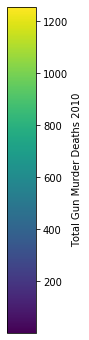

In [9]:

column_name = 'Total_Gun_Murder_Deaths_2010'
cb1 = c.show_colorbar(column_name)

In [10]:

print(['c.one_country_df.{}'.format(cn) for cn in c.one_country_df.columns if ('gun' in cn.lower()) and ('murder' in cn.lower())])

['c.one_country_df.Total_Gun_Murder_Deaths_2010', 'c.one_country_df.Gun_Murder_Rate_2010']



---
# O Canada!

In [4]:

page_tables_list = get_page_tables('https://en.wikipedia.org/wiki/Demographics_of_Canada')

[(21, (139, 8)), (4, (119, 9)), (24, (75, 2)), (15, (54, 15)), (18, (50, 15)), (25, (37, 2)), (26, (25, 2)), (12, (24, 3)), (11, (22, 5)), (33, (21, 2)), (22, (18, 3)), (13, (17, 11)), (5, (16, 3)), (0, (14, 10)), (14, (14, 22)), (17, (14, 22)), (1, (10, 10)), (2, (10, 7)), (9, (10, 6)), (39, (10, 2)), (19, (8, 5)), (10, (7, 4)), (6, (6, 3)), (30, (6, 2)), (7, (5, 3)), (20, (5, 5)), (27, (5, 2)), (29, (5, 2)), (16, (4, 11)), (32, (4, 2)), (28, (3, 2)), (31, (3, 2)), (8, (2, 10)), (34, (2, 2)), (35, (2, 2)), (36, (2, 2)), (37, (2, 2)), (38, (2, 2)), (3, (1, 4)), (23, (1, 2))]


In [7]:

canada_races_df = page_tables_list[14].copy()
canada_races_df.columns = [cn.split('[')[0].strip() for cn in canada_races_df.columns.droplevel(0).tolist()]
canada_races_df['Province/territory'] = canada_races_df['Province/territory'].map(lambda cn: cn.split('[')[0])
canada_races_df.set_index('Province/territory', drop=True, inplace=True)
canada_races_df['Percent visible minority'] = canada_races_df['Percent visible minority'].map(lambda x: float(str(x).split('%')[0]))
canada_races_df['Percent_White'] = canada_races_df['Percent visible minority'].map(lambda x: 100.0 - x)
canada_races_df.dropna(axis='columns', how='all', inplace=True)
canada_races_df.sample(5).T

Province/territory,Quebec,Ontario,Canada,Saskatchewan,Alberta
Not a visible minority,"6,740,375.00","9,070,800.00","25,186,890.00","787,745.00","2,690,960.00"
South Asian,"83,320.00","965,990.00","1,567,400.00","12,325.00","156,665.00"
Chinese,"82,845.00","629,140.00","1,324,750.00","11,300.00","133,390.00"
Black,"243,625.00","539,205.00","945,665.00","7,255.00","74,435.00"
Filipino,"31,495.00","275,380.00","619,310.00","16,025.00","106,035.00"
Latin American,"116,380.00","172,560.00","381,280.00","3,250.00","41,305.00"
Arab,"166,260.00","151,645.00","380,620.00","2,095.00","34,920.00"
Southeast Asian,"65,855.00","137,875.00","312,075.00","4,910.00","41,025.00"
West Asian,"23,445.00","122,530.00","206,840.00","1,600.00","16,030.00"
Korean,"6,665.00","78,290.00","161,130.00","1,270.00","15,000.00"


In [8]:

s.store_objects(canada_races_df=canada_races_df)

Pickling to C:\Users\dev\Documents\repositories\notebooks\StatsByCountry\saves\pickle\canada_races_df.pickle



---
# Add New Columns

In [11]:

us_stats_df.columns = ['White_Percent', 'Black_Percent', 'Hispanic_Percent', 'Asian_Percent', 'Native_Percent', 'Islander_Percent',
                       'Multi_Percent', 'Gini_Index', 'Effectiveness_Rank', 'Health_Care_Score', 'Education_Score',
                       'Economy_Score', 'Infrastructure_Score', 'Opportunity_Score', 'Fiscal_Stability_Score',
                       'Crime_Corrections_Score', 'Natural_Environment_Score', 'district_abbreviation', 'GDP_Rank', 'GDP_2018',
                       'GDP_Percent', 'State_Region', 'Homicide_Rate_2018', 'Homicide_Rate_2017', 'Homicide_Rate_2014',
                       'Homicide_Rate_2010', 'Homicide_Rate_2005', 'Homicide_Rate_2000', 'Homicide_Rate_1996', 'Guns_Rank',
                       'Guns_Per_Capita', 'Guns_Registered', 'Suicide_Rate_2017', 'Suicide_Deaths_2017', 'Suicide_Rate_2016',
                       'Suicide_Deaths_2016', 'Suicide_Rate_2015', 'Suicide_Deaths_2015', 'Suicide_Rate_2014',
                       'Suicide_Deaths_2014', 'Suicide_Rate_2005', 'Suicide_Deaths_2005',
                       'Total_Inhabitants_2010', 'Inhabitants_Per_Square_Mile_2010', 'Total_Murder_Deaths_2010',
                       'Total_Gun_Murder_Deaths_2010', 'Gun_Ownership_Percent_2013', 'Murder_Rate_2010', 'Gun_Murder_Rate_2010',
                       'State_FIPS', 'State_Population', 'Gun_Suicide_Deaths', 'Gun_Suicide_Rate', 'Google_Suggest_Unique', 'text_x',
                       'text_y', 'label_line_d', 'Google_Suggest_Common', 'Google_Suggest_First',
                       'Public_Access_to_Information', 'Political_Financing', 'Electoral_Oversight',
                       'Executive_Accountability', 'Legislative_Accountability', 'Judicial_Accountability',
                       'State_Budget_Processes', 'State_Civil_Service_Management', 'Procurement', 'Internal_Auditing',
                       'Lobbying_Disclosure', 'Ethics_Enforcement_Entities', 'State_Pension_Fund_Management', 'outline_d',
                       'centroid_x', 'centroid_y']
s.store_objects(us_stats_df=us_stats_df)

Pickling to D:\Documents\Repositories\notebooks\StatsByCountry\saves\pickle\us_stats_df.pickle


In [144]:

import xml.etree.ElementTree as et

file_path = os.path.join(s.data_folder, 'svg', 'us.svg')
#print(['root.{}'.format(fn) for fn in dir(root) if not fn.startswith('_')])
us_stats_df = s.load_object('us_stats_df')
root = et.parse(file_path).getroot()
outline_d_dict = {}
for tag in root:
    if (tag.tag.split('}')[-1] == 'path'):
        #print(['tag.{}'.format(fn) for fn in dir(tag) if not fn.startswith('_')])
        state_name = tag.attrib['data-name']
        outline_d = tag.attrib['d']
        outline_d_dict[state_name] = outline_d

df = pd.DataFrame([outline_d_dict]).T
df.columns = ['outline_d']
us_stats_df = us_stats_df.T.append(df.T).T
us_stats_df.T.tail(5).T.sample(7).T

,Mississippi,Wisconsin,Iowa,South Dakota,New Mexico,California,Alabama
Internal_Auditing,70.45,65.91,77.27,79.55,79.55,77.27,81.82
Lobbying_Disclosure,67.86,53.57,53.57,37.50,46.43,87.50,64.29
Ethics_Enforcement_Entities,66.67,61.90,70.24,44.05,40.00,72.62,71.43
State_Pension_Fund_Management,63.33,71.67,91.07,65.00,71.67,91.67,81.67
outline_d,"m 716.76,442.78427 -0.48531,0.0971 0,0.0971 0....","m 705.79187,134.80299 -2.42658,3.00896 -1.4559...","m 661.53109,197.69989 -5.33847,-2.81483 -2.911...","m 566.89455,135.57949 -16.40367,0.48532 -39.50...","m 472.45213,324.75551 0.0971,-2.52364 0.0971,-...","m 206.01387,363.77489 0.38825,2.13539 0,0.3882...","m 718.31301,344.84758 0.38826,0.77651 1.35888,..."


In [145]:

s.store_objects(us_stats_df=us_stats_df)

Pickling to C:\Users\dev\Documents\repositories\notebooks\StatsByCountry\saves\pickle\us_stats_df.pickle



---

In [5]:

file_name = 'State_Integrity_2015_Full_Dataset.xlsx'
excel_path = os.path.join(s.data_folder, 'xlsx', file_name)
sheet_df_dict = pd.read_excel(excel_path, sheet_name=None)

Public_Access_to_Information
Political_Financing
Electoral_Oversight
Executive_Accountability
Legislative_Accountability
Judicial_Accountability
State_Budget_Processes
State_Civil_Service_Management
Procurement
Internal_Auditing
_Lobbying_Disclosure
Ethics_Enforcement_Entities
State_Pension_Fund_Management


In [65]:

us_stats_df = s.load_object('us_stats_df')
for sheet_name in sheet_df_dict.keys():
    column_name = '_'.join(sheet_name.strip().split(' '))
    df = sheet_df_dict[sheet_name].copy()
    index_columns = df.loc[0, ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2']].tolist()
    df.columns = index_columns + df.columns.tolist()[3:]
    df.set_index(keys=index_columns, inplace=True)
    cn_dict = {}
    for state_name in us_stats_df.index:
        cn_dict[state_name] = []
    for index_tuple, row_series in df[states_list].iterrows():
        if str(index_tuple[1]).isdigit():
            #print(index_tuple)
            for state_name, column_value in row_series.iteritems():
                state_name = state_name.strip()
                column_value = column_value.strip()
                if str(column_value).isdigit():
                    scores_list = cn_dict[state_name]
                    scores_list.append(column_value)
                    cn_dict[state_name] = scores_list
                elif column_value.lower() in ['no', 'moderate', 'yes']:
                    scores_list = cn_dict[state_name]
                    scores_list.append(['no', 'moderate', 'yes'].index(column_value.lower())*50)
                    cn_dict[state_name] = scores_list
    cn_dict = {state_name: sum([b/len(scores_list) for b in scores_list]) for state_name,
               scores_list in cn_dict.items()}
    df = pd.DataFrame([cn_dict]).T
    df.columns = [column_name]
    us_stats_df = us_stats_df.T.append(df.T).T

In [70]:

us_stats_df.T.tail(20).T.sample(8).T

,California,Massachusetts,South Dakota,Arkansas,Virginia,West Virginia,Minnesota,North Dakota
Gun_Suicide_Rate,4.08,1.85,8.26,10.13,7.14,10.81,5.69,9.00
Google_Suggest_Unique,expensive reddit,smart,happy,backwards,strict on speeding,obese,cold in the winter,windy
text_x,204.72,937.33,517.35,649.25,867.48,830.54,599.13,514.12
text_y,287.08,140.91,167.98,342.48,257.44,242.50,112.44,111.24
label_line_d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Google_Suggest_Common,expensive,expensive,cold,boring,expensive,cheap,expensive,expensive
Google_Suggest_First,expensive,rich,cold,poor,rich,poor,cold,cold
Public_Access_to_Information,42.31,30.77,44.23,48.08,32.69,42.31,42.31,55.77
Political_Financing,72.12,92.31,48.08,54.81,42.31,54.81,67.31,41.35
Electoral_Oversight,72.50,82.50,55.00,62.50,80.00,57.50,80.00,87.50



---
# Get Correlations ("P-Hunting")

In [72]:

def get_correlation_df(numeric_columns_list):
    rows_list = []
    for x_column in numeric_columns_list:
        for y_column in numeric_columns_list:
            if x_column != y_column:
                columns_list = [x_column, y_column]
                df = us_stats_df[columns_list].dropna()
                x = df[x_column].values
                y = df[y_column].values
                try:
                    r_tuple = stats.pearsonr(x, y)
                    if r_tuple[1] < 0.05:
                        row_dict = {}
                        row_dict['left_column'] = x_column
                        row_dict['right_column'] = y_column
                        row_dict['pearson_r'] = abs(r_tuple[0])
                        rows_list.append(row_dict)
                except Exception as e:
                    print('{} and {} get an error: {}'.format(x_column, y_column, e))
    correlation_df = pd.DataFrame(rows_list, columns=['left_column', 'right_column', 'pearson_r'])
    
    return correlation_df

In [81]:

column_descriptions_df = get_column_descriptions(df=us_stats_df)
column_descriptions_df.columns

Index(['column_name', 'dtype', 'count_blanks', 'count_uniques', 'count_zeroes',
       'has_dates', 'min_value', 'max_value', 'only_integers'],
      dtype='object')

In [83]:

match_series = (column_descriptions_df.dtype == 'float32')
columns_list = [row_series.column_name for row_index, row_series in column_descriptions_df[match_series].iterrows()]
correlation_df = get_correlation_df(columns_list)

In [85]:

match_series = (correlation_df.pearson_r > 0.95)
correlation_df[match_series].sort_values('pearson_r', ascending=False).left_column.tolist()

['GDP_2018', 'GDP_Percent', 'Total_Inhabitants_2010', 'State_Population', 'Suicide_Deaths_2016', 'Suicide_Deaths_2015', 'Suicide_Deaths_2017', 'Suicide_Deaths_2016', 'Suicide_Deaths_2017', 'Suicide_Deaths_2015', 'Suicide_Deaths_2014', 'Suicide_Deaths_2015', 'Suicide_Deaths_2014', 'Suicide_Deaths_2016', 'Suicide_Deaths_2005', 'Suicide_Deaths_2015', 'Suicide_Deaths_2016', 'Suicide_Deaths_2005', 'Suicide_Deaths_2017', 'Suicide_Deaths_2014', 'Suicide_Deaths_2005', 'Suicide_Deaths_2014', 'Suicide_Deaths_2005', 'Suicide_Deaths_2017', 'Total_Murder_Deaths_2010', 'Total_Gun_Murder_Deaths_2010', 'State_Population', 'GDP_2018', 'State_Population', 'GDP_Percent', 'GDP_2018', 'Total_Inhabitants_2010', 'Total_Inhabitants_2010', 'GDP_Percent', 'Suicide_Rate_2017', 'Suicide_Rate_2016', 'Total_Murder_Deaths_2010', 'Total_Inhabitants_2010', 'Total_Murder_Deaths_2010', 'State_Population', 'Gun_Murder_Rate_2010', 'Murder_Rate_2010', 'Suicide_Rate_2016', 'Suicide_Rate_2015', 'Homicide_Rate_2010', 'Murder_

In [86]:

def get_correlation_df(x_column_list, y_column_list):
    rows_list = []
    for x_column in x_column_list:
        for y_column in y_column_list:
            if x_column != y_column:
                columns_list = [x_column, y_column]
                df = us_stats_df[columns_list].dropna()
                x = df[x_column].values
                y = df[y_column].values
                try:
                    r_tuple = stats.pearsonr(x, y)
                    if r_tuple[1] < 0.05:
                        row_dict = {}
                        row_dict['left_column'] = x_column
                        row_dict['right_column'] = y_column
                        row_dict['pearson_r'] = abs(r_tuple[0])
                        rows_list.append(row_dict)
                except Exception as e:
                    print('{} and {} get an error: {}'.format(x_column, y_column, e))
    correlation_df = pd.DataFrame(rows_list, columns=['left_column', 'right_column', 'pearson_r'])
    
    return correlation_df

In [89]:

match_series = (column_descriptions_df.dtype == 'float32')
numeric_columns_list = [row_series.column_name for row_index, row_series in column_descriptions_df[match_series].iterrows()]
new_columns_list = us_stats_df.T.tail(13).index.tolist()
old_columns_list = list(set(numeric_columns_list) - set(new_columns_list))
correlation_df = get_correlation_df(new_columns_list, old_columns_list)
correlation_df.sort_values('pearson_r', ascending=False)

,left_column,right_column,pearson_r
34,State_Budget_Processes,Homicide_Rate_2018,0.51
36,State_Budget_Processes,Homicide_Rate_2010,0.46
31,State_Budget_Processes,Homicide_Rate_2017,0.46
21,Judicial_Accountability,Native_Percent,0.46
35,State_Budget_Processes,Homicide_Rate_2014,0.43
...,...,...,...
46,State_Civil_Service_Management,Asian_Percent,0.28
16,Political_Financing,Fiscal_Stability_Score,0.28
59,Internal_Auditing,Total_Murder_Deaths_2010,0.28
12,Political_Financing,Multi_Percent,0.28



---
# Linear Scatterplots

In [90]:

def show_linear_scatterplot(merged_df, columns_list, ev_min_str=None, ev_max_str=None, rv_min_str=None, rv_max_str=None):
    ev_column_name = columns_list[0]
    rv_column_name = columns_list[1]
    explanatory_variable = get_column_description(ev_column_name)
    response_variable = get_column_description(rv_column_name)
    if (ev_min_str is None):
        ev_min_str = 'minimum {}'.format(explanatory_variable)
    if (ev_max_str is None):
        ev_max_str = 'maximum {}'.format(explanatory_variable)
    if (rv_min_str is None):
        rv_min_str = 'minimum {}'.format(response_variable)
    if (rv_max_str is None):
        rv_max_str = 'maximum {}'.format(response_variable)
    
    df = merged_df.copy()
    columns_list = [ev_column_name, rv_column_name]
    df = df[columns_list].dropna()
    ev_max = df[ev_column_name].max()
    ev_min = df[ev_column_name].min()
    rv_min = df[rv_column_name].min()
    rv_max = df[rv_column_name].max()
    ev_max_labeled = False
    ev_min_labeled = False
    rv_min_labeled = False
    rv_max_labeled = False
    
    # First order (linear) scatterplot
    fig1_fig = plt.figure(figsize=(12, 8))
    merge_axes_subplot = sns.regplot(x=ev_column_name, y=rv_column_name,
                                     scatter=True, data=df)
    xlabel_text = plt.xlabel('{} (explanatory variable)'.format(explanatory_variable))
    ylabel_text = plt.ylabel('{} (response variable)'.format(response_variable))
    
    # Add annotations
    for label, x, y in zip(df.index, df[ev_column_name], df[rv_column_name]):
        if (x == ev_min):
            if not ev_min_labeled:
                ev_min_labeled = True
                annotation = plt.annotate('{} ({})'.format(label, ev_min_str), xy=(x, y), xytext=ev_min_xytext, **kwargs)
        elif (x == ev_max):
            if not ev_max_labeled:
                ev_max_labeled = True
                annotation = plt.annotate('{} ({})'.format(label, ev_max_str), xy=(x, y), xytext=ev_max_xytext, **kwargs)
        elif (y == rv_min):
            if not rv_min_labeled:
                rv_min_labeled = True
                annotation = plt.annotate('{} ({})'.format(label, rv_min_str), xy=(x, y), xytext=rv_min_xytext, **kwargs)
        elif (y == rv_max):
            if not rv_max_labeled:
                rv_max_labeled = True
                annotation = plt.annotate('{} ({})'.format(label, rv_max_str), xy=(x, y), xytext=rv_max_xytext, **kwargs)
        elif (label == 'Arizona'):
            annotation = plt.annotate('{} (my home state)'.format(label), xy=(x, y), xytext=az_xytext, **kwargs)
    
    # Add r-squared
    x = df[ev_column_name].values
    y = df[rv_column_name].values
    plt.text(0.92, 0.965, r'$r^2 = {0:.2}$'.format(stats.pearsonr(x, y)[0] ** 2), fontsize=20, alpha=0.25,
             horizontalalignment='center', verticalalignment='center', transform=merge_axes_subplot.transAxes)

In [91]:

def get_column_description(column_name):
    if column_name in column_description_dict:
        column_description = column_description_dict[column_name]
    else:
        column_description = re.sub('^pf_', 'Personal Freedom:_', str(column_name), 1)
        column_description = re.sub('^hf_', 'Human Freedom:_', str(column_description), 1)
        column_description = re.sub('^ef_', 'Economic Freedom:_', str(column_description), 1)
        column_list = column_description.split('_')
        descr_list = []
        for word in column_list:
            descr_list.append(word[0].upper()+word[1:])
        column_description = ' '.join(descr_list)
        column_description_dict[column_name] = column_description
        s.store_objects(column_description_dict=column_description_dict)
    
    return column_description

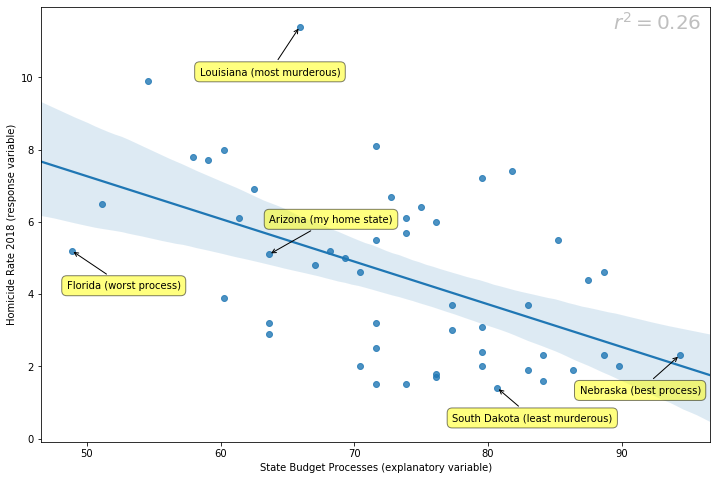

In [102]:

from scipy import stats

kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

ev_column_name = 'State_Budget_Processes'

rv_column_name = 'Homicide_Rate_2018'

ev_min_str = 'worst process'
ev_max_str = 'best process'
rv_min_str = 'least murderous'
rv_max_str = 'most murderous'
ev_min_xytext = (-5, -40)
ev_max_xytext = (-100, -40)
rv_min_xytext = (-45, -35)
rv_max_xytext = (-100, -50)
az_xytext = (0, 30)
columns_list = [ev_column_name, rv_column_name]
show_linear_scatterplot(us_stats_df, columns_list, ev_min_str=ev_min_str,
                        ev_max_str=ev_max_str, rv_min_str=rv_min_str, rv_max_str=rv_max_str)

In [103]:

correlation_df = get_correlation_df(new_columns_list, new_columns_list)
correlation_df.sort_values('pearson_r', ascending=False)

,left_column,right_column,pearson_r
3,Executive_Accountability,Legislative_Accountability,0.71
10,Legislative_Accountability,Executive_Accountability,0.71
41,Ethics_Enforcement_Entities,Executive_Accountability,0.62
8,Executive_Accountability,Ethics_Enforcement_Entities,0.62
6,Executive_Accountability,State_Civil_Service_Management,0.55
21,State_Civil_Service_Management,Executive_Accountability,0.55
15,Legislative_Accountability,Ethics_Enforcement_Entities,0.54
42,Ethics_Enforcement_Entities,Legislative_Accountability,0.54
37,Lobbying_Disclosure,State_Civil_Service_Management,0.53
23,State_Civil_Service_Management,Lobbying_Disclosure,0.53


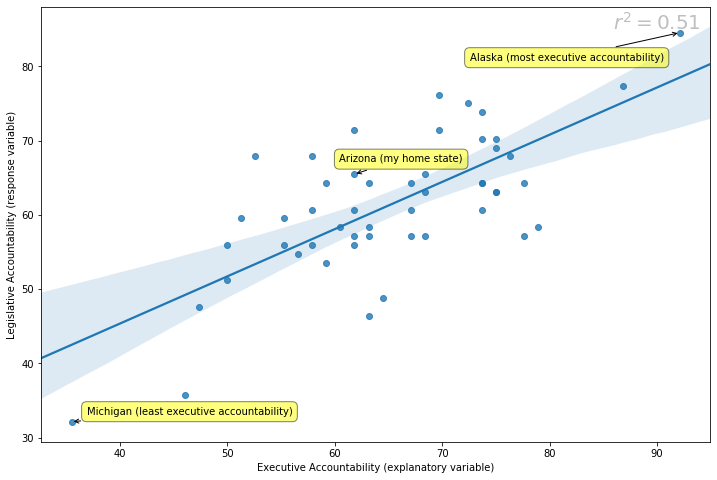

In [117]:

from scipy import stats

kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

ev_column_name = 'Executive_Accountability'

rv_column_name = 'Legislative_Accountability'

ev_min_str = 'least executive accountability'
ev_max_str = 'most executive accountability'
rv_min_str = 'least legislative accountability'
rv_max_str = 'most legislative accountability'
ev_min_xytext = (15, 5)
ev_max_xytext = (-210, -30)
rv_min_xytext = (-45, -35)
rv_max_xytext = (-100, -50)
az_xytext = (-15, 10)
columns_list = [ev_column_name, rv_column_name]
show_linear_scatterplot(us_stats_df, columns_list, ev_min_str=ev_min_str,
                        ev_max_str=ev_max_str, rv_min_str=rv_min_str, rv_max_str=rv_max_str)

In [ ]:

kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

ev_column_name = 'Guns_Registered'
rv_column_name = 'Suicide_Deaths_2017'

ev_min_str = 'least gun-nutty'
ev_max_str = 'most gun-nutty'
rv_min_str = 'least suicidal'
rv_max_str = 'most suicidal'
ev_min_xytext = (50, -10)
ev_max_xytext = (-150, -60)
rv_min_xytext = (20, -15)
rv_max_xytext = (100, -50)
az_xytext = (60, 50)
columns_list = [ev_column_name, rv_column_name]
df = us_stats_df[columns_list+['Total_Inhabitants_2010']].copy()
df[ev_column_name] = df[ev_column_name]/df['Total_Inhabitants_2010']
df[rv_column_name] = df[rv_column_name]/df['Total_Inhabitants_2010']
match_series = (df.index == 'Wyoming')
show_linear_scatterplot(df[~match_series], columns_list, ev_min_str=ev_min_str,
                        ev_max_str=ev_max_str, rv_min_str=rv_min_str, rv_max_str=rv_max_str)

In [ ]:

us_stats_df = s.load_object('us_stats_df')
tables_url = 'https://en.wikipedia.org/wiki/Firearm_death_rates_in_the_United_States_by_state'
tables_df_list = get_page_tables(tables_url, verbose=True)

In [ ]:

us_stats_df.district_abbreviation.to_dict()

In [ ]:

gun_murders_df = tables_df_list[4].copy()
gun_murders_df.set_index('State', inplace=True)
print(gun_murders_df.columns.tolist())
gun_murders_df.columns = ['Total_Inhabitants_2010', 'Inhabitants_Per_Square_Mile_2010', 'Total_Murder_Deaths_2010',
                          'Total_Gun_Murder_Deaths_2010', 'Gun_Ownership_Percent_2013', 'Murder_Rate_2010',
                          'Gun_Murder_Rate_2010']
gun_murders_df.Gun_Ownership_Percent_2013 = gun_murders_df.Gun_Ownership_Percent_2013.map(lambda x: float(str(x).split('%')[0]))
gun_murders_df.sample(5).T

In [ ]:

gun_suicides_df = s.load_csv(csv_name='gun_suicides_by_state',
                             folder_path=s.data_folder).dropna(axis=0, how='all').dropna(axis=1, how='all')
gun_suicides_df = gun_suicides_df.iloc[11:].dropna(axis=1, how='all')
abbrev_dict = {row_series.district_abbreviation: state_name for state_name, row_series in us_stats_df.iterrows()}
abbrev_dict['DC'] = 'District of Columbia'
gun_suicides_df.ST = gun_suicides_df.ST.map(lambda x: abbrev_dict[x])
gun_suicides_df.columns = ['State', 'State_FIPS', 'State_Population', 'Gun_Suicide_Deaths', 'Gun_Suicide_Rate']
gun_suicides_df.set_index('State', inplace=True)
gun_suicides_df.Gun_Suicide_Rate = gun_suicides_df.Gun_Suicide_Rate.map(lambda x: float(x))
for column_name in ['State_FIPS', 'State_Population', 'Gun_Suicide_Deaths']:
    gun_suicides_df[column_name] = gun_suicides_df[column_name].map(lambda x: int(x))
gun_suicides_df.sample(5).T

In [ ]:

set(gun_merge_df.columns).intersection(set(us_stats_df.columns))

In [ ]:

columns_list = ['White_Percent', 'Black_Percent', 'Hispanic_Percent', 'Asian_Percent', 'Native_Percent', 'Islander_Percent',
                'Multi_Percent', 'Gini_Index', 'Effectiveness_Rank', 'Health_Care_Score', 'Education_Score', 'Economy_Score',
                'Infrastructure_Score', 'Opportunity_Score', 'Fiscal_Stability_Score', 'Crime_Corrections_Score',
                'Natural_Environment_Score', 'district_abbreviation', 'GDP_Rank', 'GDP_2018', 'GDP_Percent', 'State_Region',
                'Homicide_Rate_2018', 'Homicide_Rate_2017', 'Homicide_Rate_2014', 'Homicide_Rate_2010', 'Homicide_Rate_2005',
                'Homicide_Rate_2000', 'Homicide_Rate_1996', 'Guns_Rank', 'Guns_Per_Capita', 'Guns_Registered',
                'Suicide_Rate_2017', 'Suicide_Deaths_2017', 'Suicide_Rate_2016', 'Suicide_Deaths_2016', 'Suicide_Rate_2015',
                'Suicide_Deaths_2015', 'Suicide_Rate_2014', 'Suicide_Deaths_2014', 'Suicide_Rate_2005', 'Suicide_Deaths_2005']
us_stats_df = pd.merge(left=us_stats_df[columns_list], right=gun_merge_df, left_index=True,
                          right_index=True, suffixes=('_merge', '_guns'))

In [ ]:

us_stats_df.columns.tolist()

In [ ]:

column_descriptions_df = get_column_descriptions(df=us_stats_df, column_list=us_stats_df.columns)
match_series = (column_descriptions_df.dtype.isin(['int64', 'float64']))
print(column_descriptions_df[~match_series].column_name.tolist())
column_descriptions_df[~match_series]

In [ ]:

column_descriptions_df = get_column_descriptions(us_stats_df)
column_descriptions_df['dtype'].unique()

In [ ]:

match_series = (column_descriptions_df['dtype'].isin(['int64', 'float64']))
numeric_columns_list = column_descriptions_df[match_series]['column_name'].tolist()

In [ ]:

for column_name in numeric_columns_list:
    us_stats_df[column_name] = pd.to_numeric(us_stats_df[column_name])

In [ ]:

from scipy import stats

r_columns_list = []
rows_list = []
for x_column in numeric_columns_list:
    for y_column in numeric_columns_list:
        if x_column != y_column:
            columns_list = [x_column, y_column]
            df = us_stats_df[columns_list].dropna()
            x = df[x_column].values
            y = df[y_column].values
            try:
                r_tuple = stats.pearsonr(x, y)
                if r_tuple[1] < 0.05:
                    c_tuple = ('/'.join(columns_list), row_dict['pearson_r'])
                    r_columns_list.append(c_tuple)
            except Exception as e:
                print('{} and {} get an error: {}'.format(x_column, y_column, e))

In [ ]:

column_pairs_list = sorted(r_columns_list, key=lambda x: x[1], reverse=True)
[column_pairs_list[0][0].split('/')[0], column_pairs_list[0][0].split('/')[1]]

In [ ]:

us_stats_df = s.load_object('us_stats_df')
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

ev_column_name = 'Guns_Registered'
column_description_dict[ev_column_name] = 'Number of Guns Registered'
#s.store_objects(column_description_dict=column_description_dict)

rv_column_name = 'Gun_Murder_Rate_2010'
column_description_dict[rv_column_name] = 'Gun Murder Rate'
s.store_objects(column_description_dict=column_description_dict)

ev_min_str = 'least gun-nutty'
ev_max_str = 'most gun-nutty'
rv_min_str = 'least murderous'
rv_max_str = 'most murderous'
ev_min_xytext = (-5, 90)
ev_max_xytext = (-130, -60)
rv_min_xytext = (20, -15)
rv_max_xytext = (-100, -50)
az_xytext = (-60, 50)
columns_list = [ev_column_name, rv_column_name]
show_linear_scatterplot(us_stats_df, columns_list, ev_min_str=ev_min_str,
                        ev_max_str=ev_max_str, rv_min_str=rv_min_str, rv_max_str=rv_max_str)

In [ ]:

import re
from scipy import stats
%run ../../load_magic/dataframes.py

us_stats_df = s.load_object('us_stats_df')
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

ev_column_name = 'Guns_Registered'
column_description_dict[ev_column_name] = 'Number of Guns Registered'
#s.store_objects(column_description_dict=column_description_dict)

rv_column_name = 'Gun_Suicide_Deaths'
column_description_dict[rv_column_name] = 'Gun Suicide Deaths'
s.store_objects(column_description_dict=column_description_dict)

ev_min_str = 'least gun-nutty'
ev_max_str = 'most gun-nutty'
rv_min_str = 'least suicidal'
rv_max_str = 'most suicidal'
ev_min_xytext = (-5, 110)
ev_max_xytext = (-130, -60)
rv_min_xytext = (20, -30)
rv_max_xytext = (-100, -50)
az_xytext = (-60, 50)
columns_list = [ev_column_name, rv_column_name]
show_linear_scatterplot(us_stats_df, columns_list, ev_min_str=ev_min_str,
                        ev_max_str=ev_max_str, rv_min_str=rv_min_str, rv_max_str=rv_max_str)

In [ ]:

rows_list = []
for row_index, row_series in correlation_df.sort_values('pearson_r', ascending=False).iterrows():
    left_column = row_series['left_column']
    right_column = row_series['right_column']
    if ('gun' in left_column.lower()) or ('gun' in right_column.lower()):
        rows_list.append(row_series.to_dict())
pd.DataFrame(rows_list).head(20)

In [ ]:

rows_list = []
for row_index, row_series in correlation_df.sort_values('pearson_r', ascending=False).iterrows():
    left_column = row_series['left_column']
    right_column = row_series['right_column']
    if ('gun' in left_column.lower()) or ('gun' in right_column.lower()):
        rows_list.append(row_series.to_dict())
pd.DataFrame(rows_list).head(20)

In [ ]:

#print(['row_series.{}'.format(fn) for fn in dir(row_series) if 'dict' in fn.lower()])

In [ ]:

tables_url = 'https://www.thoughtco.com/gun-owners-percentage-of-state-populations-3325153'
tables_df_list = get_page_tables(tables_url, verbose=True)

In [ ]:

nutty_df = tables_df_list[0].dropna(axis=0, how='all').dropna(axis=1, how='all')
nutty_df.columns = ['Guns_Rank', 'State', 'Guns_Per_Capita', 'Guns_Registered']
nutty_df = nutty_df.iloc[1:]
nutty_df.set_index('State', inplace=True)
us_stats_df = pd.merge(left=us_stats_df, right=nutty_df, left_index=True,
                          right_index=True, suffixes=('_merge', '_nutty'))
s.store_objects(us_stats_df=us_stats_df)

In [ ]:

suicide_df = s.load_csv(csv_name='Suicide Mortality by State',
                        folder_path=s.data_folder).dropna(axis=0, how='all').dropna(axis=1, how='all')
columns_list = ['Suicide_Year', 'district_abbreviation', 'Suicide_Rate', 'Suicide_Deaths']
suicide_df.columns = columns_list + ['URL']
suicide_df = suicide_df[columns_list]
suicide_df.Suicide_Year = suicide_df.Suicide_Year.map(lambda x: int(x))
suicide_df = s.load_csv(csv_name='Suicide Mortality by State',
                        folder_path=s.data_folder).dropna(axis=0, how='all').dropna(axis=1, how='all')
suicide_df

In [ ]:

for year in suicide_df.Suicide_Year.unique():
    match_series = (suicide_df.Suicide_Year == year)
    df = suicide_df[match_series]
    columns_list = ['district_abbreviation', 'Suicide_Rate_{}'.format(year),
                    'Suicide_Deaths_{}'.format(year)]
    df.columns = ['Suicide_Year'] + columns_list
    df = df[columns_list]
    us_stats_df = pd.merge(left=us_stats_df, right=df, how='inner', on='district_abbreviation', suffixes=('_merge', '_suicide'))

In [ ]:

print(us_stats_df.columns.tolist())

In [ ]:

import re

for column_name in ['Guns_Rank', 'Guns_Registered']:
    us_stats_df[column_name] = us_stats_df[column_name].map(lambda x: int(x))
us_stats_df.Guns_Per_Capita = us_stats_df.Guns_Per_Capita.map(lambda x: float(x))
for year in [2005, 2014, 2015, 2016, 2017]:
    for infix in ['Rate', 'Deaths']:
        column_name = 'Suicide_{}_{}'.format(infix, year)
        us_stats_df[column_name] = us_stats_df[column_name].map(lambda x: int(re.sub(r'\D+', '', str(x))))

In [ ]:

us_stats_df.Suicide_Deaths_2017.unique()

In [ ]:

#us_stats_df['district_abbreviation']
file_path = os.path.join(s.data_folder, 'html', 'us_state_abbreviations.html')
#tables_url = 'https://www.50states.com/abbreviations.htm'
tables_df_list = get_page_tables(file_path, verbose=True)

In [ ]:

abbrevs_df = tables_df_list[0].dropna(axis=0, how='all').dropna(axis=1, how='all')
abbrevs_df.columns = ['State', 'district_abbreviation']
us_stats_df = pd.merge(left=us_stats_df, right=abbrevs_df, on='district_abbreviation', suffixes=('_merge', '_abbrevs'))
us_stats_df.set_index('State', inplace=True)
us_stats_df.sample(5).T

In [ ]:

s.store_objects(us_stats_df=us_stats_df)

In [ ]:

columns_list = ['Guns_Rank', 'Guns_Per_Capita', 'Guns_Registered', 'Suicide_Rate_2017', 'Suicide_Deaths_2017', 'Suicide_Rate_2016',
                'Suicide_Deaths_2016', 'Suicide_Rate_2015', 'Suicide_Deaths_2015', 'Suicide_Rate_2014', 'Suicide_Deaths_2014',
                'Suicide_Rate_2005', 'Suicide_Deaths_2005']
get_column_descriptions(df=us_stats_df, column_list=columns_list)

In [ ]:

get_max_rsquared_adj(df=us_stats_df, columns_list=columns_list,
                     verbose=False).sort_values('max_similarity', ascending=False)

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

basecolor_list = list(mcolors.BASE_COLORS.keys())

In [ ]:

import re
from scipy import stats
%run ../../load_magic/dataframes.py

us_stats_df = s.load_object('us_stats_df')
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

ev_column_name = 'Guns_Registered'
column_description_dict[ev_column_name] = 'Number of Guns Registered'
s.store_objects(column_description_dict=column_description_dict)

rv_column_name = 'Suicide_Deaths_2017'
column_description_dict[rv_column_name] = 'Suicide Deaths in 2017'
s.store_objects(column_description_dict=column_description_dict)

ev_min_str = 'least gun-nutty'
ev_max_str = 'most gun-nutty'
rv_min_str = 'least suicidal'
rv_max_str = 'most suicidal'
ev_min_xytext = (-5, 150)
ev_max_xytext = (-130, -100)
rv_min_xytext = (20, -30)
rv_max_xytext = (-100, -50)
az_xytext = (-80, 50)
columns_list = [ev_column_name, rv_column_name]
show_linear_scatterplot(us_stats_df, columns_list, ev_min_str=ev_min_str,
                        ev_max_str=ev_max_str, rv_min_str=rv_min_str, rv_max_str=rv_max_str)

In [ ]:

s.store_objects(us_stats_df=us_stats_df)

In [ ]:

tables_url = 'https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_GDP'
tables_df_list = pd.read_html(tables_url)
print([(i, df.shape) for (i, df) in enumerate(tables_df_list) if df.shape[0] > 50])

In [ ]:

state_gdps_df = tables_df_list[2].dropna(axis=0, how='all').dropna(axis=1, how='all')
state_gdps_df.columns = ['Rank', 'State', '2018', '% of Nation', 'Region']
state_gdps_df = state_gdps_df.iloc[1:]
state_gdps_df.set_index('State', inplace=True)
for column_name in ['Rank', '2018']:
    state_gdps_df[column_name] = state_gdps_df[column_name].map(lambda x: int(str(x).split('[')[0]))
for column_name in ['% of Nation']:
    state_gdps_df[column_name] = state_gdps_df[column_name].map(lambda x: float(str(x).split('[')[0]))
for column_name in ['Region']:
    state_gdps_df[column_name] = state_gdps_df[column_name].map(lambda x: str(x).split('[')[0])
state_gdps_df

In [ ]:

us_stats_df = load_object('us_stats_df')
print(us_stats_df.shape, state_gdps_df.shape)
us_stats_df = pd.merge(left=us_stats_df, right=state_gdps_df, left_index=True, right_index=True, suffixes=('_merge', '_gdp'))
print(us_stats_df.shape)
us_stats_df.columns.tolist()

In [ ]:

us_stats_df.columns = ['White_Percent', 'Black_Percent', 'Hispanic_Percent', 'Asian_Percent', 'Native_Percent', 'Islander_Percent',
                          'Multi_Percent', 'Gini_Index', 'Effectiveness_Rank', 'Health_Care_Score', 'Education_Score', 'Economy_Score',
                          'Infrastructure_Score', 'Opportunity_Score', 'Fiscal_Stability_Score', 'Crime_Corrections_Score',
                          'Natural_Environment_Score', 'district_abbreviation', 'GDP_Rank', 'GDP_2018', 'GDP_Percent', 'State_Region']
store_objects(us_stats_df=us_stats_df)

In [ ]:

us_stats_df.sample(10).T

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

explanatory_variable = 'Effectiveness Rank'
ev_column_name = 'Effectiveness_Rank'
response_variable = 'GDP Rank'
rv_column_name = 'GDP_Rank'

In [ ]:

df = us_stats_df.copy()
ev_min_str = 'most effective'
ev_max_str = 'least effective'
rv_min_str = 'highest GDP'
rv_max_str = 'lowest GDP'
ev_min_xytext = (-5, 150)
ev_max_xytext = (-135, -30)
rv_min_xytext = (20, -10)
rv_max_xytext = (-100, -50)
us_xytext = (-90, 40)

fig1_fig = plt.figure(figsize=(12,8))
columns_list = [ev_column_name, rv_column_name]
df = df[columns_list].dropna()

# First order (linear) scatterplot
merge_axes_subplot = sns.regplot(x=ev_column_name, y=rv_column_name,
                                 scatter=True, data=df)
xlabel_text = plt.xlabel('{} (explanatory variable)'.format(explanatory_variable))
ylabel_text = plt.ylabel('{} (response variable)'.format(response_variable))
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
ev_max = df[ev_column_name].max()
ev_min = df[ev_column_name].min()
rv_min = df[rv_column_name].min()
rv_max = df[rv_column_name].max()
for label, x, y in zip(df.index, df[ev_column_name], df[rv_column_name]):
    if (x == ev_min):
        annotation = plt.annotate('{} ({})'.format(label, ev_min_str), xy=(x, y), xytext=ev_min_xytext, **kwargs)
    elif (x == ev_max):
        annotation = plt.annotate('{} ({})'.format(label, ev_max_str), xy=(x, y), xytext=ev_max_xytext, **kwargs)
    elif (y == rv_min):
        annotation = plt.annotate('{} ({})'.format(label, rv_min_str), xy=(x, y), xytext=rv_min_xytext, **kwargs)
    elif (y == rv_max):
        annotation = plt.annotate('{} ({})'.format(label, rv_max_str), xy=(x, y), xytext=rv_max_xytext, **kwargs)

In [ ]:

tables_url = 'https://en.wikipedia.org/wiki/List_of_U.S._states_by_homicide_rate'
tables_df_list = pd.read_html(tables_url)
print([(i, df.shape) for (i, df) in enumerate(tables_df_list) if df.shape[0] >= 50])

In [ ]:

homicide_df = tables_df_list[0]
homicide_df.set_index('State', inplace=True)
for column_name in homicide_df.columns:
    homicide_df[column_name] = homicide_df[column_name].map(lambda x: float(x))
homicide_df.columns = ['Homicide_Rate_{}'.format(cn) for cn in homicide_df.columns]
homicide_df.sample(5)

In [ ]:

print(us_stats_df.shape, homicide_df.shape)
us_stats_df = pd.merge(left=us_stats_df, right=homicide_df, left_index=True, right_index=True, suffixes=('_merge', '_homicide'))
print(us_stats_df.shape)
us_stats_df.columns.tolist()

In [ ]:

store_objects(us_stats_df=us_stats_df)

In [ ]:

us_stats_df.sample(10).T

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

explanatory_variable = 'Percent Black'
ev_column_name = 'Black_Percent'
response_variable = 'Homicide Rate 2014'
rv_column_name = 'Homicide_Rate_2014'

In [ ]:

def show_linear_scatterplot(merged_df, columns_list, ev_min_str=None, ev_max_str=None, rv_min_str=None, rv_max_str=None):
    ev_column_name = columns_list[0]
    rv_column_name = columns_list[1]
    explanatory_variable = get_column_description(ev_column_name)
    response_variable = get_column_description(rv_column_name)
    if (ev_min_str is None):
        ev_min_str = 'minimum {}'.format(explanatory_variable)
    if (ev_max_str is None):
        ev_max_str = 'maximum {}'.format(explanatory_variable)
    if (rv_min_str is None):
        rv_min_str = 'minimum {}'.format(response_variable)
    if (rv_max_str is None):
        rv_max_str = 'maximum {}'.format(response_variable)
    
    df = merged_df.copy()
    columns_list = [ev_column_name, rv_column_name]
    df = df[columns_list].dropna()
    ev_max = df[ev_column_name].max()
    ev_min = df[ev_column_name].min()
    rv_min = df[rv_column_name].min()
    rv_max = df[rv_column_name].max()
    ev_max_labeled = False
    ev_min_labeled = False
    rv_min_labeled = False
    rv_max_labeled = False
    
    # First order (linear) scatterplot
    fig1_fig = plt.figure(figsize=(12,8))
    merge_axes_subplot = sns.regplot(x=ev_column_name, y=rv_column_name,
                                     scatter=True, data=df)
    xlabel_text = plt.xlabel('{} (explanatory variable)'.format(explanatory_variable))
    ylabel_text = plt.ylabel('{} (response variable)'.format(response_variable))
    
    # Add annotations
    for label, x, y in zip(df.index, df[ev_column_name], df[rv_column_name]):
        if (x == ev_min):
            if not ev_min_labeled:
                ev_min_labeled = True
                annotation = plt.annotate('{} ({})'.format(label, ev_min_str), xy=(x, y), xytext=ev_min_xytext, **kwargs)
        elif (x == ev_max):
            if not ev_max_labeled:
                ev_max_labeled = True
                annotation = plt.annotate('{} ({})'.format(label, ev_max_str), xy=(x, y), xytext=ev_max_xytext, **kwargs)
        elif (y == rv_min):
            if not rv_min_labeled:
                rv_min_labeled = True
                annotation = plt.annotate('{} ({})'.format(label, rv_min_str), xy=(x, y), xytext=rv_min_xytext, **kwargs)
        elif (y == rv_max):
            if not rv_max_labeled:
                rv_max_labeled = True
                annotation = plt.annotate('{} ({})'.format(label, rv_max_str), xy=(x, y), xytext=rv_max_xytext, **kwargs)
        elif (label == 'Arizona'):
            annotation = plt.annotate('{} (my home state)'.format(label), xy=(x, y), xytext=az_xytext, **kwargs)
    
    # Add r-squared
    x = df[ev_column_name].values
    y = df[rv_column_name].values
    plt.text(0.92, 0.965, r'$r^2 = {0:.2}$'.format(stats.pearsonr(x, y)[0] ** 2), fontsize=20, alpha=0.25,
             horizontalalignment='center', verticalalignment='center', transform=merge_axes_subplot.transAxes)

In [ ]:

import re
from scipy import stats

us_stats_df = load_object('us_stats_df')
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
ev_min_str = 'least black'
ev_max_str = 'most black'
rv_min_str = 'least murderous'
rv_max_str = 'most murderous'
ev_min_xytext = (-5, 150)
ev_max_xytext = (-130, -100)
rv_min_xytext = (20, -10)
rv_max_xytext = (-100, -50)
az_xytext = (-80, 60)
columns_list = [ev_column_name, rv_column_name]
show_linear_scatterplot(us_stats_df, columns_list, ev_min_str=ev_min_str, ev_max_str=ev_max_str, rv_min_str=rv_min_str, rv_max_str=rv_max_str)